<a href="https://colab.research.google.com/github/Shri-Aiswarya/NLP/blob/main/NLP_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1.
Compute the Jaccard similarity index

• Load ‘word_tokenize’ and ‘WordNetLemmatizer’ from nltk, among
other libraries

• Use these pairs for comparison:

o pair1 = ["What you do defines you","Your deeds define you"]

o pair2 = ["Once upon a time there lived a king.", "Who is your
queen?"]

o pair3 = ["He is desperate", "Is he not desperate?"]

• What is the Jaccard similarity index between pair1[0] and pair1[1]?

In [7]:
#Importing the required libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Downloading necessary NLTK resources
nltk.download('wordnet')

#Defining a function to calculate Jaccard Similarity
def jaccard_similarity(str1, str2):

    #Initializing the lemmatizer
    lemmatizer = WordNetLemmatizer()

    #Tokenizing and lemmatizing each string
    tokens1 = word_tokenize(str1.lower())  # Convert to lowercase for uniformity
    tokens2 = word_tokenize(str2.lower())

    #Lemmatizing tokens
    lemmatized1 = [lemmatizer.lemmatize(word) for word in tokens1]
    lemmatized2 = [lemmatizer.lemmatize(word) for word in tokens2]

    #Converting the tokenized lists into sets
    set1 = set(lemmatized1)
    set2 = set(lemmatized2)

    #Calculating the intersection and union
    intersection = set1.intersection(set2)
    union = set1.union(set2)

    #Computing the Jaccard similarity
    jaccard_index = len(intersection) / len(union)
    return jaccard_index

#Sentences to compare
pair1 = ["What you do defines you", "Your deeds define you"]

#Printing the Jaccard similarity between pair1[0] and pair1[1]
similarity = jaccard_similarity(pair1[0], pair1[1])
print(f"Jaccard similarity between pair1[0] and pair1[1]: {similarity:.4f}")


[nltk_data] Downloading package wordnet to /root/nltk_data...


Jaccard similarity between pair1[0] and pair1[1]: 0.1429


Exercise 2.
Compute the Levenshtein distance between "I cannot believe
what he said" and "I believe it is not what he said". What does the result
mean?

In [ ]:
#Importing the required libraries
!pip install python-Levenshtein
import Levenshtein

#The sentences
sentence1 = "I cannot believe what he said"
sentence2 = "I believe it is not what he said"

#Computing the Levenshtein distance
levenshtein_distance = Levenshtein.distance(sentence1, sentence2)

#Printing the result
print(f"Levenshtein distance: {levenshtein_distance}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.1 MB/s eta 0:00:00
Levenshtein distance: 15


Exercise 3.
Compute the most similar words to 'government' and 'curfew'
based on the text.

In [6]:
#Opening and reading the content of the file
with open("Europe_Covid.txt", "r") as file:
    text = file.read()

#Displaying the first 500 characters of the text to check the content
print("First 500 characters of the text:")
print(text[:500])

#Installing Spacy and Downloading the English Model
!pip install spacy
#Downloading the pre-trained English model if not already installed
!python -m spacy download en_core_web_md

#Loading Spacy and Process the Text
import spacy

#Loading the pre-trained English model
nlp = spacy.load("en_core_web_md")

#Processing the uploaded text with Spacy
doc = nlp(text)

#Defining the target words for similarity calculation
word1 = nlp("government")
word2 = nlp("curfew")

#Computing Similarity for 'government' and 'curfew' with All Other Words in the Text
similar_words_1 = [(token.text, word1.similarity(token)) for token in doc if token.has_vector]
similar_words_2 = [(token.text, word2.similarity(token)) for token in doc if token.has_vector]

#Sorting the results by Similarity Score
similar_words_1 = sorted(similar_words_1, key=lambda x: x[1], reverse=True)
similar_words_2 = sorted(similar_words_2, key=lambda x: x[1], reverse=True)

#Printing the Top 5 Most Similar Words to 'government' and 'curfew'
print("\nMost similar words to 'government':")
for word, similarity in similar_words_1[:5]:
    print(f"{word}: {similarity:.4f}")

print("\nMost similar words to 'curfew':")
for word, similarity in similar_words_2[:5]:
    print(f"{word}: {similarity:.4f}")


First 500 characters of the text:
European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe's political class. Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday. Duda said that he was feeling well, was asymptomatic and would continue working in isolation. "As you can see, I am full of strength. I hope it will stay this way. Howe
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

Most similar words to 'government':
government:

Exercise 4.
What is the sentiment and subjectivity of the Europe_Covid
text?

In [5]:
#Opening and reading the content of the file
with open("Europe_Covid.txt", "r") as file:
    text = file.read()

#Installing TextBlob for Sentiment and Subjectivity Analysis
!pip install textblob

#Importing TextBlob and performing Sentiment & Subjectivity Analysis
from textblob import TextBlob

#Creating a TextBlob object
blob = TextBlob(text)

#Getting the sentiment polarity and subjectivity
sentiment = blob.sentiment.polarity  # -1 to 1 (Negative to Positive)
subjectivity = blob.sentiment.subjectivity  # 0 to 1 (Objective to Subjective)

#Displaying the Results
print(f"\nSentiment (Polarity): {sentiment:.4f}")
print(f"Subjectivity: {subjectivity:.4f}")

#Calculating sentiment
if sentiment > 0:
    sentiment_type = "positive"
elif sentiment < 0:
    sentiment_type = "negative"
else:
    sentiment_type = "neutral"

#Printing the results
print(f"Overall Sentiment: {sentiment_type.capitalize()}")



Sentiment (Polarity): 0.0499
Subjectivity: 0.3476
Overall Sentiment: Positive


Exercise 5. WordCloud

• What are the most frequently used words in the Europe_Covid text?

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


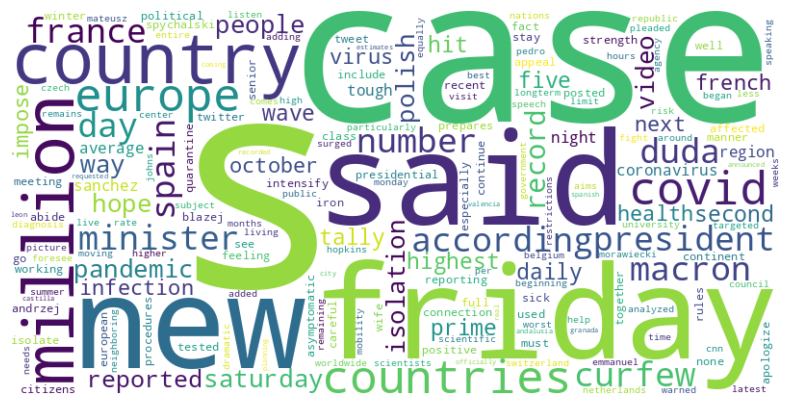


Most Common Words:
's: 6
cases: 5
friday: 5
said: 5
``: 5
'': 5
new: 5
country: 4
million: 4
countries: 3


In [4]:
#Opening and reading the content of the file
with open("Europe_Covid.txt", "r") as file:
    text = file.read()

#Installing the required libraries
!pip install wordcloud
!pip install matplotlib
!pip install nltk

#Preprocessing the Text (Remove Stopwords, Punctuation)
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Downloading the NLTK stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

#Defining the stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

#Tokenizing the text
tokens = word_tokenize(text)

#Removing stopwords and punctuation
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word not in punctuation]

#Creating the WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Joining the filtered words back into a single string
filtered_text = ' '.join(filtered_tokens)

#Generating the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

#Displaying the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Displaying the most frequent words
from collections import Counter

#Getting the word frequencies
word_freq = Counter(filtered_tokens)

#Printing the 10 most common words
print("\nMost Common Words:")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")


Exercise 6.
Summarize the text in 5 sentences using extractive
summarization.

In [2]:
#Importing the required libraries
!pip install transformers
from transformers import pipeline

#Initializing the summarizer
summarizer = pipeline("summarization")

#Opening and reading the content of the file
with open("Europe_Covid.txt", "r") as file:
    text = file.read()

#Summarizing the text
print("Extractive Summary:")
print(summary[0]['summary_text'])


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Extractive Summary:
 Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski . Duda said he was feeling well, was asymptomatic and would continue working in isolation . Poland reported 13,632 new cases Friday, the highest daily tally since the pandemic began . France reported 42,032 new cases in 24 hours, a new record .


Exercise 7.
 Use a zero-shot transformer to determine the following
categories: informational, query, advocacy, not informational.

In [3]:
#Installing Hugging Face's transformers and torch libraries
!pip install transformers
!pip install torch

#Importing the required libraries
from transformers import pipeline

#Defining the Zero-Shot Classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

#Defining the Categories
candidate_labels = ["informational", "query", "advocacy", "not informational"]

#Opening and reading the content of the file
with open("Europe_Covid.txt", "r") as file:
    text = file.read()

#Classifying the text into the Categories
result = classifier(text, candidate_labels)

#Displaying the results
print("\nZero-Shot Classification Results:")
print(f"Text Category: {result['labels'][0]}")
print(f"Confidence: {result['scores'][0]:.4f}")


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


Zero-Shot Classification Results:
Text Category: advocacy
Confidence: 0.3609
